In [31]:
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm

with open('./dataset/output/class_names.txt','r') as f:
    ClassName = []
    for cl in f.readlines():
        if '\n' in cl:
            cl = cl[:-1]
        ClassName.append(cl)
Num_class = {}
Area_class = {}
for cl in ClassName:
    Num_class[cl] = 0
    Area_class[cl] = 0
    
directory = os.listdir('./dataset/output/SegmentationClass')
for image in tqdm(directory):
    img = np.load('./dataset/output/SegmentationClass/'+image)
    unique, counts = np.unique(img, return_counts=True)
    for i in range(len(unique)):
        Num_class[ClassName[unique[i]]] +=1
        Area_class[ClassName[unique[i]]] += counts[i]
        

100%|██████████| 41539/41539 [14:42<00:00, 47.06it/s]


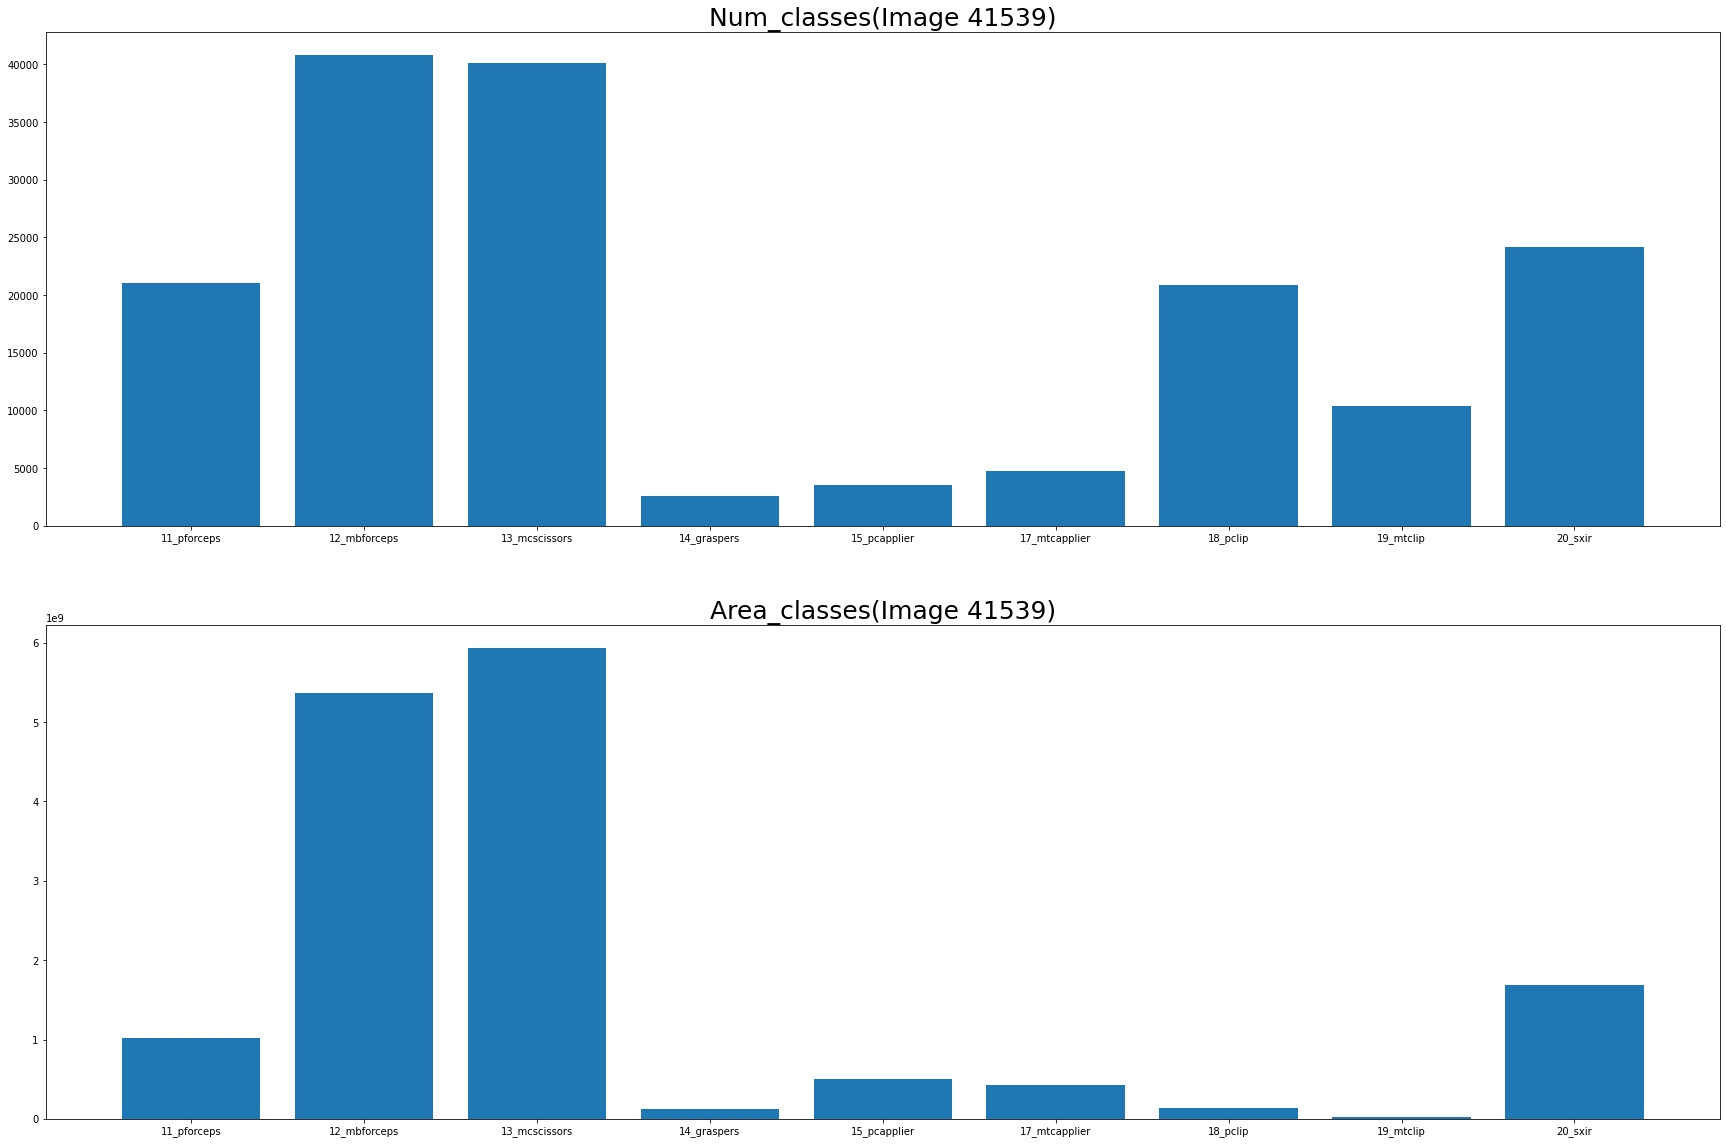

In [32]:
import matplotlib.pylab as plt

lists = sorted(Num_class.items()) 
x, y = zip(*lists) 

plt.figure(figsize=(30,20))
plt.subplot(2,1,1)
plt.title('Num_classes(Image %d)'% len(directory),fontsize=25)
plt.bar(x[:-1], y[:-1])

lists = sorted(Area_class.items()) 
x, y = zip(*lists) 

plt.subplot(2,1,2)
plt.title('Area_classes(Image %d)'% len(directory), fontsize=25)
plt.bar(x[:-1], y[:-1])
plt.show()